In [8]:
import numpy as np
import pandas as pd

**读入数据**

In [9]:
train_df = pd.read_csv('./input/train.csv',index_col=0)
test_df = pd.read_csv('./input/test.csv', index_col=0)

**检视源数据**

In [10]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)": np.log1p(train_df['SalePrice'])})
prices.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D40AEECAC8>,
      dtype=object)

label本身并不平滑，需要“平滑化”（正态化）。注意一般不要miss掉，导致自己的结构总是达不到一定的标准。
使用有逼格的log1p,即log(x+1)可解决这种情况。这里是把数据平滑了，最后结果还需要把预测的平滑数据变回来

In [12]:
y_train = np.log1p(train_df.pop('SalePrice'))

将剩下的数据合并起来

In [13]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape

(2919, 79)

In [14]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

需要把MSSubClass编程string

In [15]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [16]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

把category的变量编程numerial, 需要注意数字本身有大小含义，不能乱用数字，因此使用one-hot编码, pandas的get_dummies方法， 可以一键做到One-Hot

In [17]:
pd.get_dummies(all_df["MSSubClass"], prefix="MSSubClass").head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


对缺失数据的处理

In [19]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head()

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
dtype: int64

使用平均值进行空缺数据进行填充

In [20]:
mean_cols = all_dummy_df.mean()
mean_cols.head(8)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
dtype: float64

In [21]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [22]:
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
all_dummy_df.isnull().sum().sum()

0

**标准化numerical数据**，需要看那些本身是numerical

In [24]:
numerical_cols = all_df.columns[all_df.dtypes != 'object']
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

使用log使数据平滑

In [25]:
numerical_col_means = all_dummy_df.loc[:, numerical_cols].mean()
numerical_col_std = all_dummy_df.loc[:, numerical_cols].std()
all_dummy_df.loc[:, numerical_cols] = (all_dummy_df.loc[:,numerical_cols] - numerical_col_means) / numerical_col_std

## 4. 建立模型

把数据及分回 训练/测试集

In [26]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_train_df.shape,dummy_test_df.shape

((1460, 288), (1459, 288))

Redge Regression模型来跑数据

In [27]:
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score

用sklearn自带的cross validation方法来测试模型

In [28]:
x_train = dummy_train_df.values
x_test = dummy_test_df.values
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, x_train,y_train, cv=10, 
                                          scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

调参，存下所有的cv，看看那个alpha值更好，使用GridSearch也可以进行

In [29]:
import matplotlib.pyplot as plt

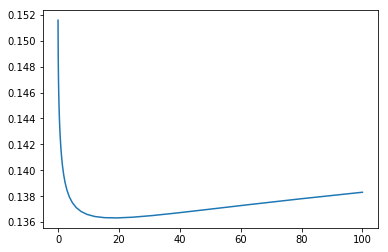

In [30]:
plt.plot(alphas, test_scores)

结论：大概alpha=10~20的时候，可以吧score达到0.135左右

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features_feat=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv = 5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

TypeError: __init__() got an unexpected keyword argument 'max_features_feat'

In [ ]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")